<a href="https://colab.research.google.com/github/AbduzZami/ColabNotebooks/blob/main/GAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [773]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/20250821_125537.jpg')

Resized Image:


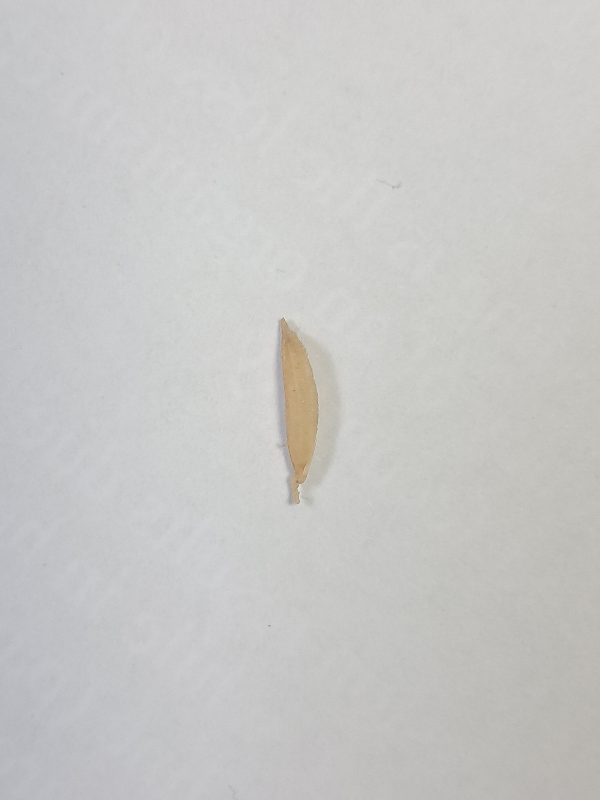

In [774]:
# Define the desired width (adjust as needed)
desired_width = 600

# Calculate the aspect ratio and new height
aspect_ratio = img.shape[1] / img.shape[0]
desired_height = int(desired_width / aspect_ratio)

# Resize the image
img = cv2.resize(img, (desired_width, desired_height))

# Display the resized image
print("Resized Image:")
cv2_imshow(img)

Image with Only White Color Range Kept:


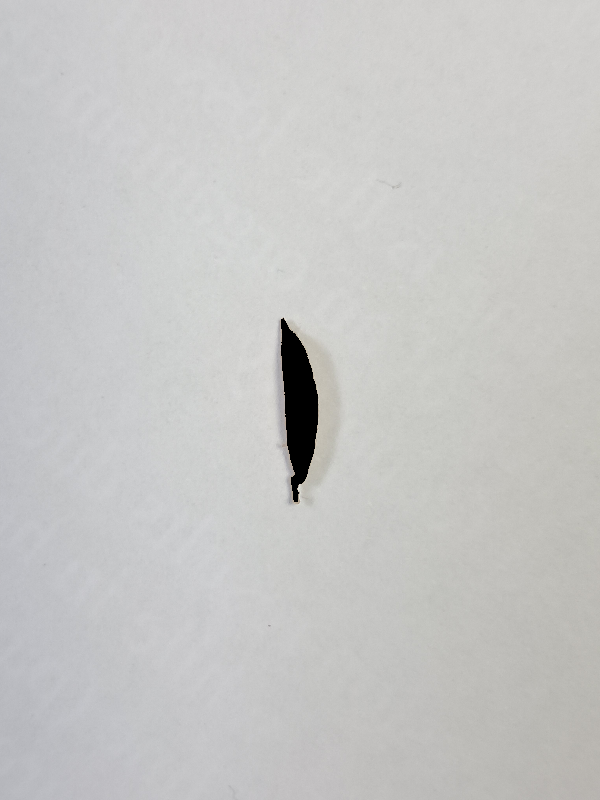

In [775]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Define the range for white color in HSV (adjust these values as needed)
# White is represented by high V (Value/Brightness)
lower_white = np.array([0, 0, 0])
upper_white = np.array([255, 50, 255]) # A wider range for saturation to include off-white

# Create a mask to isolate the white color
mask = cv2.inRange(hsv, lower_white, upper_white)

# Apply the mask to the original image to keep only the white areas
result_white = cv2.bitwise_and(img, img, mask=mask)

# Display the image with only the white areas
print("Image with Only White Color Range Kept:")
cv2_imshow(result_white)

Binary Image of result_white:


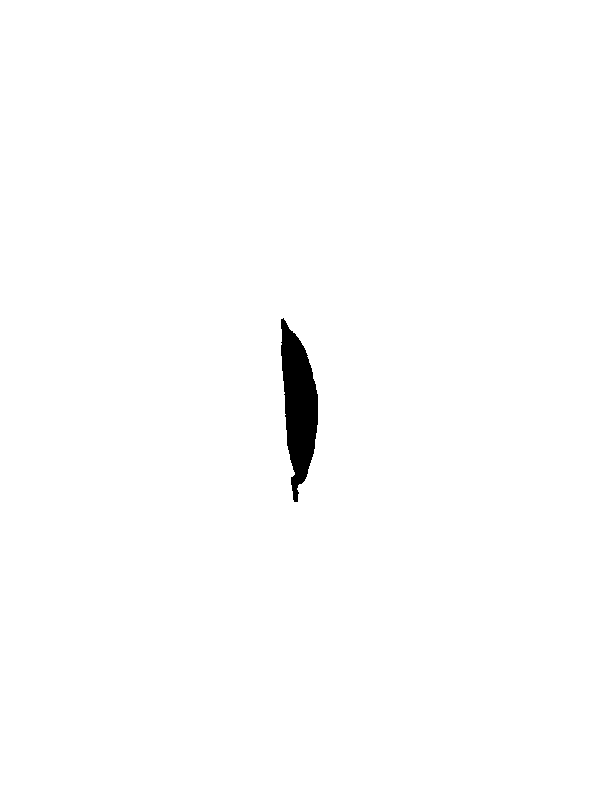

In [776]:
# Convert non-zero pixels in result_white to 255
ret, binary_result_white = cv2.threshold(result_white, 0, 255, cv2.THRESH_BINARY)

# Display the binary image
print("Binary Image of result_white:")
cv2_imshow(binary_result_white)

Inverted Binary Image:


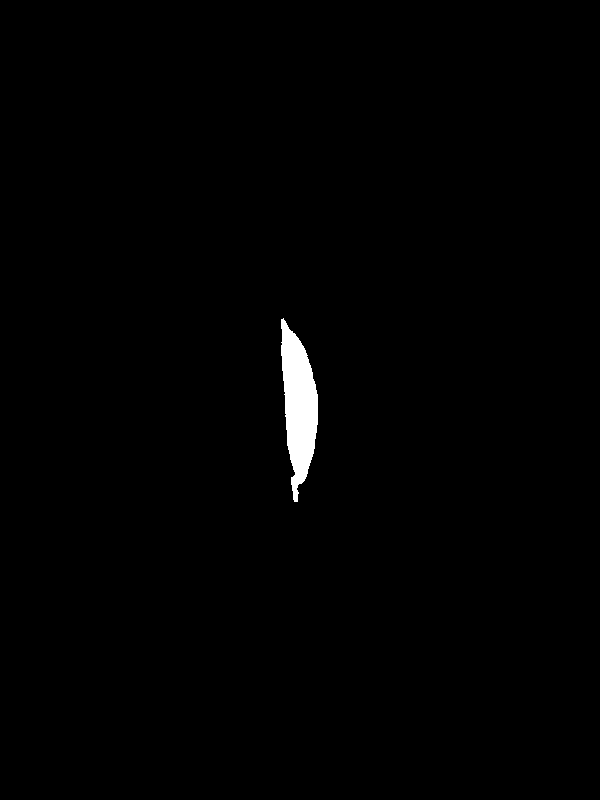

In [777]:
# Invert the binary image
inverted_binary_result_white = cv2.bitwise_not(binary_result_white)

# Display the inverted binary image
print("Inverted Binary Image:")
cv2_imshow(inverted_binary_result_white)

In [778]:
# # Convert result_white to grayscale
# gray_result_white = cv2.cvtColor(inverted_binary_result_white, cv2.COLOR_BGR2GRAY)

# # Create a mask where non-black pixels are white (255) and black pixels are black (0)
# # Adjust the threshold value (e.g., 10) if there are near-black colors you want to consider black
# ret, non_black_mask = cv2.threshold(gray_result_white, 180, 255, cv2.THRESH_BINARY)

# # Create a white image of the same size as the original
# white_img = np.full_like(img, 255, dtype=np.uint8)

# # Use the non_black_mask to copy white pixels from the white_img to the areas where result_white was not black
# result_non_black_white = cv2.bitwise_and(white_img, white_img, mask=non_black_mask)

# # Use the inverted mask to keep the black areas from result_white
# black_mask = cv2.bitwise_not(non_black_mask)
# result_black_kept = cv2.bitwise_and(result_white, result_white, mask=black_mask)

# # Combine the two results
# final_processed_white = cv2.add(result_non_black_white, result_black_kept)

# final_processed_white[final_processed_white == 255] = 0

# # Display the final image
# print("Processed result_white with non-black pixels converted to white:")
# cv2_imshow(final_processed_white)

In [779]:
# final_processed_white[final_processed_white == 255] = 0

In [780]:
# # Convert non-zero pixels to 255 in the grayscale inverted image
# ret, binary_img = cv2.threshold(final_processed_white, 0, 255, cv2.THRESH_BINARY)

# # Display the binary image
# print("Binary Image (non-zero pixels are white):")
# cv2_imshow(binary_img)

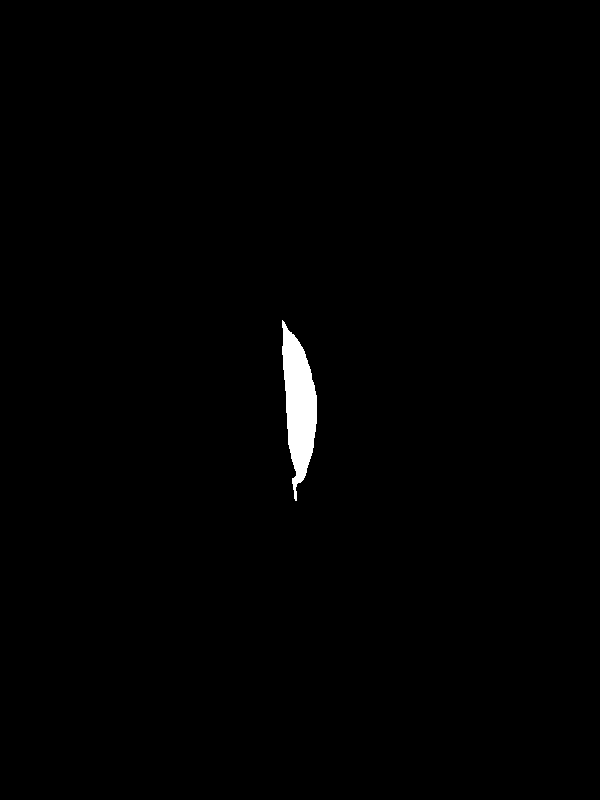

In [781]:
# Ensure your image is binary
binary = np.where(inverted_binary_result_white > 0, 255, 0).astype(np.uint8)

# Define a kernel (3x3 or 5x5 depending on dot size)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Apply erosion
eroded = cv2.erode(binary, kernel, iterations=1)

cv2_imshow(eroded)

In [782]:
# Convert result_white to grayscale
eroded_gray = cv2.cvtColor(eroded, cv2.COLOR_BGR2GRAY)

Image with only the boundary:


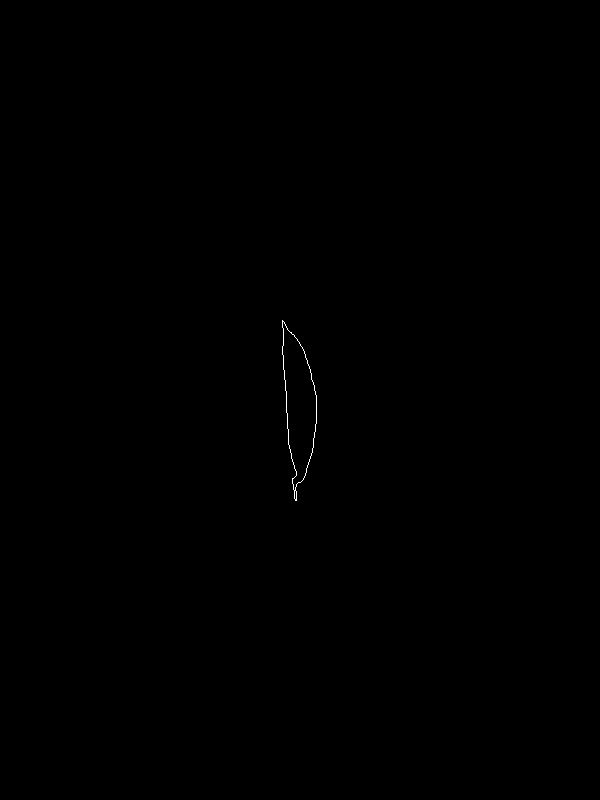

In [783]:
contours, hierarchy = cv2.findContours(eroded_gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

boundary_img = np.zeros_like(img)
cv2.drawContours(boundary_img, contours, -1, (255, 255, 255), 1)

# Display the image with only the boundary
print("Image with only the boundary:")
cv2_imshow(boundary_img)

Number of boundary points: 366
First 10 points:
 [[282 320]
 [282 321]
 [282 322]
 [282 323]
 [282 324]
 [282 325]
 [282 326]
 [282 327]
 [283 328]
 [283 329]]


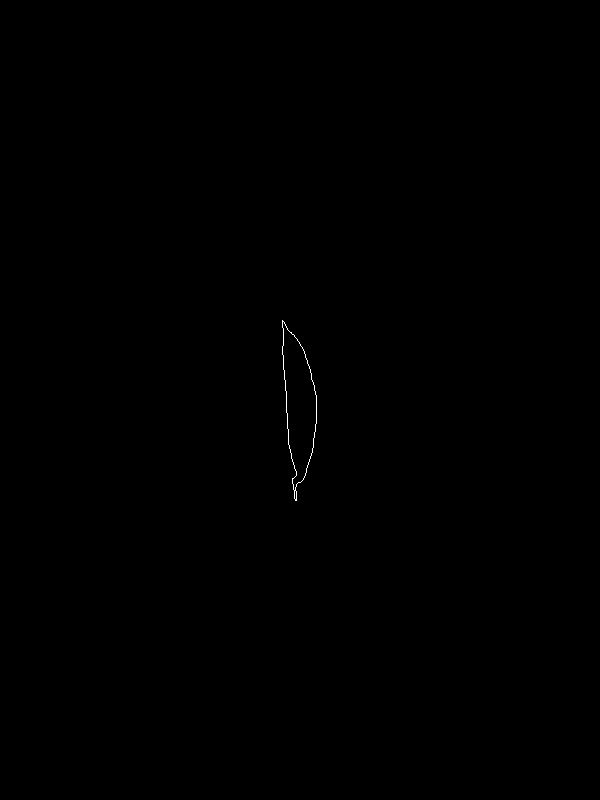

In [784]:
import cv2
import numpy as np

# Get the largest contour (if multiple objects exist)
contour = max(contours, key=cv2.contourArea)

# Extract boundary points (serially ordered)
boundary_points = contour.squeeze()  # shape (N, 2) -> [[x1,y1], [x2,y2], ...]

print("Number of boundary points:", len(boundary_points))
print("First 10 points:\n", boundary_points[:10])

# Optional: visualize the points on an empty canvas
boundary_img = np.zeros_like(img)
for (x, y) in boundary_points:
    boundary_img[y, x] = 255  # mark the point as white

cv2_imshow(boundary_img)


Original points: 366
Sampled points: 37
First 10 sampled:
 [[282 320]
 [283 330]
 [283 340]
 [282 350]
 [283 360]
 [284 370]
 [285 380]
 [285 390]
 [286 400]
 [286 410]]


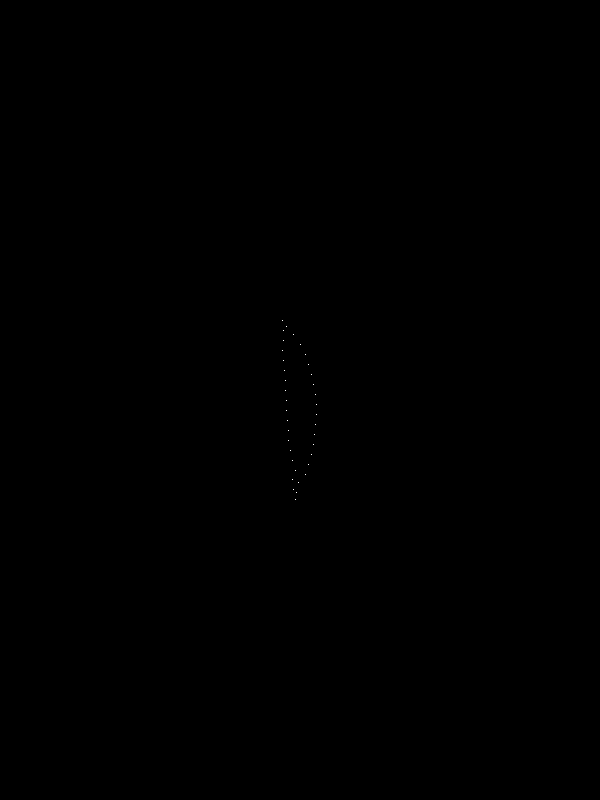

In [785]:
gap = 10  # take every 5th point

sampled_points = boundary_points[::gap]

print("Original points:", len(boundary_points))
print("Sampled points:", len(sampled_points))
print("First 10 sampled:\n", sampled_points[:10])


boundary_img = np.zeros_like(img)

# Draw only the sampled points
for (x, y) in sampled_points:
    boundary_img[y, x] = 255

cv2_imshow(boundary_img)


In [786]:
angles = []

def angle_between_three_points(p1, p2, p3, orientation="CCW"):
    v1 = np.array(p1) - np.array(p2)
    v2 = np.array(p3) - np.array(p2)

    # normalize
    v1 = v1 / np.linalg.norm(v1)
    v2 = v2 / np.linalg.norm(v2)

    # interior angle (always ≤ 180)
    dot = np.dot(v1, v2)
    dot = np.clip(dot, -1.0, 1.0)
    interior = np.degrees(np.arccos(dot))

    # cross product z-component
    cross = v1[0]*v2[1] - v1[1]*v2[0]

    # decide convex vs concave
    if orientation == "CCW":
        if cross < 0:   # concave → reflex
            return 360 - interior
        else:           # convex → interior
            return interior
    else:  # CW orientation
        if cross > 0:   # concave → reflex
            return 360 - interior
        else:
            return interior


# ===== main loop =====
for i in range(len(sampled_points) - 2):
    p1, p2, p3 = sampled_points[i], sampled_points[i+1], sampled_points[i+2]
    angle = angle_between_three_points(p1, p2, p3, orientation="CCW")  # adjust orientation if needed

    if angle > 180:  # only reflex
        print(f"Reflex angle at index {i+1}: {angle:.2f}°")
        angles.append(angle)

print("All stored angles:", angles)


Reflex angle at index 1: 185.71°
Reflex angle at index 2: 185.71°
Reflex angle at index 6: 185.71°
Reflex angle at index 8: 185.71°
Reflex angle at index 11: 185.71°
Reflex angle at index 15: 215.13°
Reflex angle at index 19: 183.18°
Reflex angle at index 20: 209.88°
All stored angles: [np.float64(185.71059313749964), np.float64(185.71059313749964), np.float64(185.71059313749964), np.float64(185.71059313749964), np.float64(185.71059313749964), np.float64(215.13419305691565), np.float64(183.17983011986425), np.float64(209.87599269168942)]


In [787]:
# Subtract 180 from each angle and sum
result = sum(angle - 180 for angle in angles)

print(len(angles))
print("Sum after subtracting 180 from each angle:", result)

8
Sum after subtracting 180 from each angle: 96.74298155596753
